# **Problem**

## **Critical risk analysis for intraday trading using widely used algorithm like Black-Scholes, Random-Walk and comparison of those algorithm with the help of TWAP MCAD strategy.**

**With our project, we are trying to compare and see if we can get precise values with least error using famous algorithms like Black-Scholes and strategies TWAP and MACD for intraday traders.**



**Intraday trade:**

---


Intraday trading means buying and selling stocks on the same trading day. 
Intraday trading is also known as Day Trading.
Advantages of Intraday Trading: avoid tangible risk in holding shares overnight and reading the pulse of the market.

---


**Option trading:**

---


It grants you the right but not the obligation to buy or sell an underlying asset at a set price on or before a certain date. 

---


**European Option:**

---


It is a version of an options contract that limits execution to its expiration date. 
BSM- Black-Scholes model
Is a differential equation widely used to price options contracts. 
Published by Mryon Scholes and Fischer Black in 1973.


**A few questions we are looking to answer are as follows:**

---


How much risk does a particular stock hold in a day period?

---


Do these algorithms do justice for intraday trade?

---


What would be the value at risk?

---


Getting entry and exit points through Moving Average Convergence/Divergence.

---


See how good option trading is for intraday trades.

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels

In [172]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2
Sklearn version: 1.0.2
Statsmodels version: 0.12.2


In [ ]:
!ipython profile locate default

Unable to create process using 'C:\Users\Dinya ANTONY\anaconda3\python.exe "C:\Users\Dinya ANTONY\anaconda3\Scripts\ipython-script.py" profile locate default'


In this project we will get the stock options data from refinitiv. In order to do this we will use the eikon package. You can find installation steps below.


In [ ]:
pip install eikon

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: httpx>=0.18.0 in c:\users\dinya antony\anaconda3\lib\site-packages (from eikon) (0.23.1)



In [ ]:
import eikon as ek
ek.set_app_key('f6577f17e5314a40845464760d5a6da7ffc77dfc')

In [ ]:
import eikon.data_grid as rd

In [ ]:
df2 = ek.get_news_headlines('AAPL.O')
df2.shape

(10, 4)

In [ ]:
df = ek.get_timeseries('AAPL.O',start_date="2012-01-01",end_date="2022-12-31")

df

AAPL.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,302259098.259098
2012-01-04,14.809985,14.7657,14.617128,14.642843,56155,260244692.244692
2012-01-05,14.948199,14.929628,14.7382,14.819628,58360,271267491.267491
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,318385966.385966
2012-01-09,15.27677,15.061771,15.048199,15.196417,80332,394023562.023562
...,...,...,...,...,...,...
2022-12-22,134.56,132.23,130.3,134.352,643296,77852108.0
2022-12-23,132.415,131.86,129.64,130.92,541275,63814893.0
2022-12-27,131.41,130.03,128.72,131.38,608331,69007830.0


In [ ]:
df3 = ek.get_timeseries('AAPL.O',start_date="2012-10-01",end_date="2022-12-31", interval='minute')

df3

AAPL.O,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2022-10-13 23:58:00,142.8,142.71,142.725,142.71,30,3264
2022-10-13 23:59:00,142.81,142.73,142.77,142.81,29,1667
2022-10-14 00:00:00,142.83,142.76,142.83,142.83,38,1657
2022-10-14 08:01:00,143.6,143.0,143.0,143.05,74,5807
2022-10-14 08:02:00,143.2,143.03,143.14,143.15,31,642
...,...,...,...,...,...,...
2022-12-29 15:34:00,129.35,129.14,129.318,129.22,1842,258636
2022-12-29 15:35:00,129.3875,129.2,129.215,129.32,1324,204013
2022-12-29 15:36:00,129.51,129.27,129.3162,129.4714,1879,231724


In [ ]:
intraday=df3
intraday.to_csv('intraday.csv',index = True)

In [ ]:
TenYears= df
TenYears.to_csv('10_years.csv',index = True)

In [ ]:
df = ek.get_data( ['AAPL.O'],
    fields = [
        'TR.TotalCurrentAssets',
        'TR.BIDPRICE',
        'TR.ASKPRICE', 
        'ADJUST_CLS',
        'TR.MONEYNESS'
    ],
    parameters = {
        'Curn': 'EUR',
        'SDate': '2022-10-13',
        'EDate': '2022-12-29',
        'Frq': 'D'
    }
)


df2 = pd.DataFrame(df[0])
df2.head()

,Instrument,Total Current Assets,Bid Price,Ask Price,ADJUST_CLS,Moneyness
0,AAPL.O,115106796480,146.229799,146.260496,126.04,<NA>
1,AAPL.O,115106796480,142.380566,142.514324,<NA>,<NA>
2,AAPL.O,115106796480,144.745328,144.755493,<NA>,<NA>
3,AAPL.O,115106796480,145.949726,145.959876,<NA>,<NA>
4,AAPL.O,115106796480,147.273016,147.28325,<NA>,<NA>


In [173]:
#loading temp data
df = pd.read_csv('10_years.csv')
df.head()

,Date,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
0,2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08
1,2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08
2,2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08
3,2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08
4,2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2764 non-null   object 
 1   HIGH    2764 non-null   float64
 2   CLOSE   2764 non-null   float64
 3   LOW     2764 non-null   float64
 4   OPEN    2764 non-null   float64
 5   COUNT   2764 non-null   int64  
 6   VOLUME  2764 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [175]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2764 non-null   datetime64[ns]
 1   HIGH    2764 non-null   float64       
 2   CLOSE   2764 non-null   float64       
 3   LOW     2764 non-null   float64       
 4   OPEN    2764 non-null   float64       
 5   COUNT   2764 non-null   int64         
 6   VOLUME  2764 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.3 KB


In [176]:
#setting up the index
df.set_index(keys='Date',inplace=True)

## **Dataset ready**

In [177]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08


In [178]:
df.shape

(2764, 6)

## **Analysing Closing value of stock per day.**

In [179]:
df['CLOSE'].describe()

count    2764.000000
mean       58.535662
std        47.946462
min        13.947486
25%        24.158119
50%        37.611250
75%        77.183125
max       182.010000
Name: CLOSE, dtype: float64

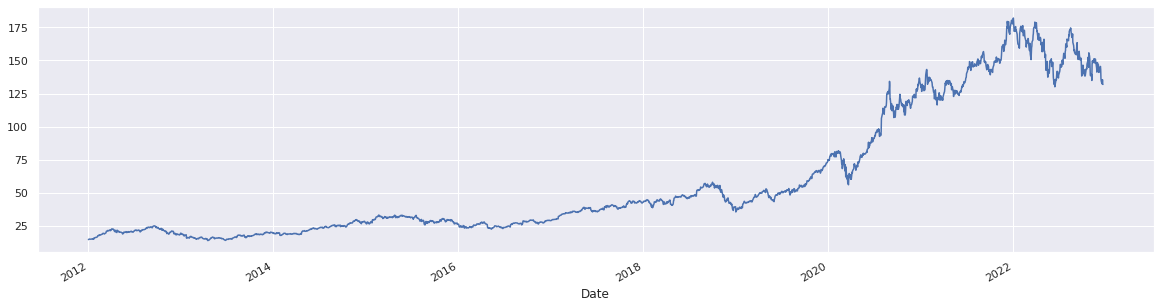

In [180]:
# The following code is to set to show the flow

from pylab import rcParams
rcParams['figure.figsize'] = 20,5
df['CLOSE'].plot(grid=True)

**A good thing for our model is that for now the min and max for our data is positive.**

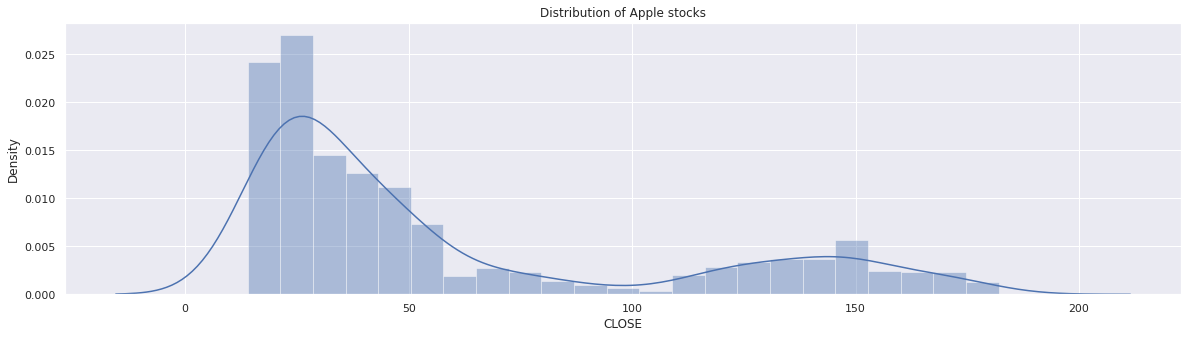

In [181]:
sns.distplot(df['CLOSE'])
plt.title('Distribution of Apple stocks')
plt.show()

**We get almost a highly left-skewed, let's do a Log transfromation data.**

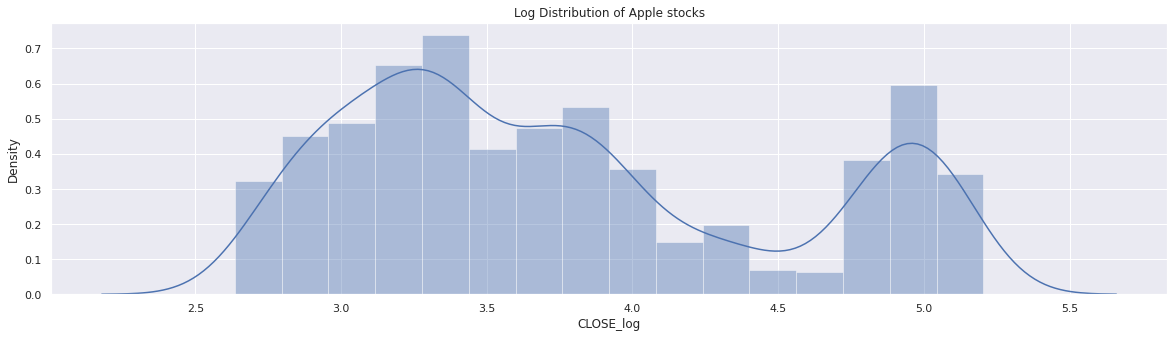

In [182]:
df['CLOSE_log'] = np.log(df['CLOSE'])
sns.distplot(df['CLOSE_log'])
plt.title('Log Distribution of Apple stocks')
plt.show()

In [183]:
#skewness and kurtosis
print("Skewness: %f" % df['CLOSE'].skew())
print("Kurtosis: %f" % df['CLOSE'].kurt())

Skewness: 1.165539
Kurtosis: -0.136809


**We may encounter some outliers on the lower end.**

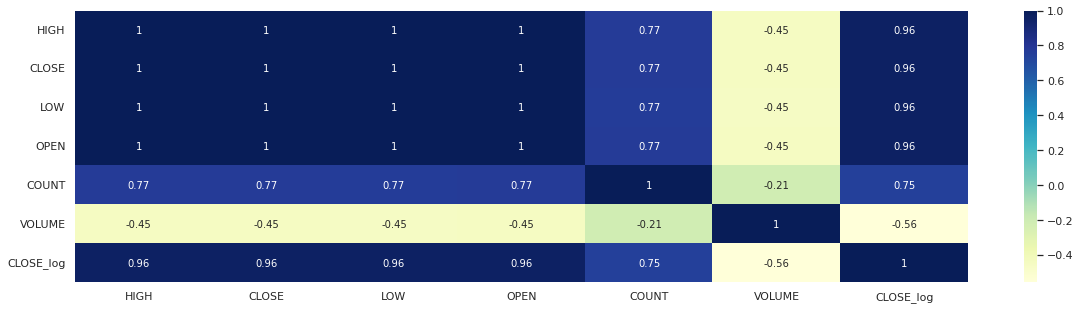

In [184]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

**We can see a perfect co-relation amount our variables, except for volume.**

***Moving average (MA)***

A moving average is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. They are 3 types the 10 moving average, the 20 moving average and the 50 moving average. In our case we will use the short term, also know as 10MA.

In [185]:
# Moving average using closing price and volume
# Calculate moving average
arr = df['CLOSE'].to_numpy()
ma = 10
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array to consider
# every window of size 10
while i < len(arr):
    
    # Store elements from i to i+ma in list to get the current window
    window = arr[i : i + ma]
  
    # Calculate the average of current window
    window_average = round(sum(window) / ma, 2)
      
    # Store the average of current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages)

[14.99, 15.06, 15.11, 15.12, 15.14, 15.13, 15.21, 15.29, 15.39, 15.5, 15.62, 15.71, 15.81, 15.95, 16.08, 16.26, 16.36, 16.54, 16.7, 16.88, 17.07, 17.22, 17.38, 17.54, 17.72, 17.88, 18.02, 18.12, 18.24, 18.35, 18.47, 18.64, 18.79, 18.9, 18.96, 19.02, 19.11, 19.19, 19.29, 19.41, 19.57, 19.72, 19.86, 20.11, 20.38, 20.63, 20.84, 21.02, 21.22, 21.38, 21.48, 21.57, 21.62, 21.68, 21.77, 21.84, 21.97, 22.11, 22.19, 22.23, 22.25, 22.23, 22.16, 22.13, 22.05, 21.92, 21.71, 21.47, 21.23, 21.17, 21.12, 21.11, 21.13, 21.03, 20.95, 20.93, 20.9, 20.89, 20.92, 20.77, 20.64, 20.51, 20.42, 20.32, 20.17, 19.99, 19.86, 19.84, 19.8, 19.8, 19.78, 19.77, 19.82, 19.91, 20.02, 20.13, 20.25, 20.26, 20.31, 20.31, 20.37, 20.4, 20.41, 20.39, 20.37, 20.41, 20.49, 20.58, 20.63, 20.65, 20.66, 20.66, 20.64, 20.65, 20.64, 20.68, 20.7, 20.74, 20.83, 20.93, 21.04, 21.18, 21.29, 21.38, 21.51, 21.59, 21.64, 21.67, 21.68, 21.68, 21.64, 21.61, 21.51, 21.42, 21.35, 21.31, 21.32, 21.32, 21.3, 21.34, 21.41, 21.48, 21.64, 21.8, 2

In [186]:
# Moving average using closing price and volume
# Calculate moving average
arr = df['CLOSE'].to_numpy()
ma = 20
  
i = 0
# Initialize an empty list to store moving averages
moving_averages20 = []
  
# Loop through the array to consider
# every window of size 10
while i < len(arr):
    
    # Store elements from i to i+ma in list to get the current window
    window = arr[i : i + ma]
  
    # Calculate the average of current window
    window_average = round(sum(window) / ma, 2)
      
    # Store the average of current window in moving average list
    moving_averages20.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages20)

[15.31, 15.39, 15.46, 15.54, 15.61, 15.69, 15.79, 15.92, 16.04, 16.19, 16.34, 16.47, 16.6, 16.74, 16.9, 17.07, 17.19, 17.33, 17.47, 17.62, 17.77, 17.93, 18.09, 18.22, 18.34, 18.45, 18.57, 18.66, 18.76, 18.88, 19.02, 19.18, 19.33, 19.51, 19.67, 19.83, 19.98, 20.11, 20.25, 20.39, 20.53, 20.64, 20.74, 20.89, 21.07, 21.24, 21.4, 21.57, 21.7, 21.81, 21.86, 21.9, 21.89, 21.91, 21.91, 21.88, 21.84, 21.79, 21.71, 21.7, 21.68, 21.67, 21.64, 21.58, 21.5, 21.42, 21.3, 21.18, 21.08, 20.97, 20.88, 20.81, 20.77, 20.67, 20.56, 20.46, 20.38, 20.36, 20.36, 20.29, 20.21, 20.14, 20.12, 20.11, 20.1, 20.06, 20.06, 20.05, 20.05, 20.06, 20.07, 20.08, 20.11, 20.15, 20.19, 20.27, 20.37, 20.42, 20.47, 20.48, 20.51, 20.53, 20.53, 20.52, 20.5, 20.54, 20.59, 20.66, 20.73, 20.79, 20.85, 20.92, 20.97, 21.01, 21.07, 21.13, 21.17, 21.2, 21.25, 21.3, 21.34, 21.39, 21.4, 21.4, 21.43, 21.45, 21.48, 21.5, 21.49, 21.51, 21.52, 21.55, 21.57, 21.61, 21.64, 21.68, 21.73, 21.77, 21.81, 21.89, 22.0, 22.1, 22.27, 22.42, 22.56, 2

In [187]:
# Moving average using closing price and volume
# Calculate moving average
arr = df['CLOSE'].to_numpy()
ma = 50
  
i = 0
# Initialize an empty list to store moving averages
moving_averages50 = []
  
# Loop through the array to consider
# every window of size 10
while i < len(arr):
    
    # Store elements from i to i+ma in list to get the current window
    window = arr[i : i + ma]
  
    # Calculate the average of current window
    window_average = round(sum(window) / ma, 2)
      
    # Store the average of current window in moving average list
    moving_averages50.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages50)

[17.15, 17.27, 17.39, 17.52, 17.65, 17.78, 17.91, 18.03, 18.17, 18.31, 18.44, 18.57, 18.69, 18.84, 18.98, 19.13, 19.26, 19.4, 19.53, 19.65, 19.77, 19.88, 19.96, 20.07, 20.17, 20.26, 20.33, 20.38, 20.43, 20.51, 20.58, 20.65, 20.71, 20.77, 20.82, 20.87, 20.9, 20.94, 20.97, 20.99, 21.01, 21.03, 21.04, 21.05, 21.06, 21.06, 21.05, 21.07, 21.07, 21.07, 21.05, 21.04, 21.03, 21.01, 20.99, 20.96, 20.94, 20.91, 20.89, 20.86, 20.83, 20.8, 20.79, 20.75, 20.71, 20.68, 20.64, 20.61, 20.58, 20.54, 20.51, 20.49, 20.48, 20.46, 20.43, 20.43, 20.44, 20.46, 20.5, 20.49, 20.5, 20.5, 20.52, 20.53, 20.54, 20.56, 20.59, 20.62, 20.65, 20.67, 20.7, 20.72, 20.73, 20.75, 20.78, 20.82, 20.88, 20.91, 20.95, 20.98, 21.02, 21.07, 21.1, 21.13, 21.16, 21.21, 21.26, 21.31, 21.35, 21.41, 21.47, 21.53, 21.59, 21.66, 21.72, 21.8, 21.86, 21.92, 21.98, 22.04, 22.11, 22.18, 22.25, 22.33, 22.4, 22.45, 22.5, 22.56, 22.62, 22.69, 22.75, 22.82, 22.89, 22.96, 23.02, 23.07, 23.11, 23.16, 23.2, 23.24, 23.28, 23.33, 23.4, 23.45, 23.4

In [188]:
df['10MA'] = moving_averages
df['20MA'] = moving_averages20
df['50MA'] = moving_averages50
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,10MA,20MA,50MA
Date,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,14.99,15.31,17.15
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.06,15.39,17.27
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.11,15.46,17.39
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08,2.713747,15.12,15.54,17.52
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08,2.712160,15.14,15.61,17.65


Text(0.5, 1.0, 'APPLE moving average')

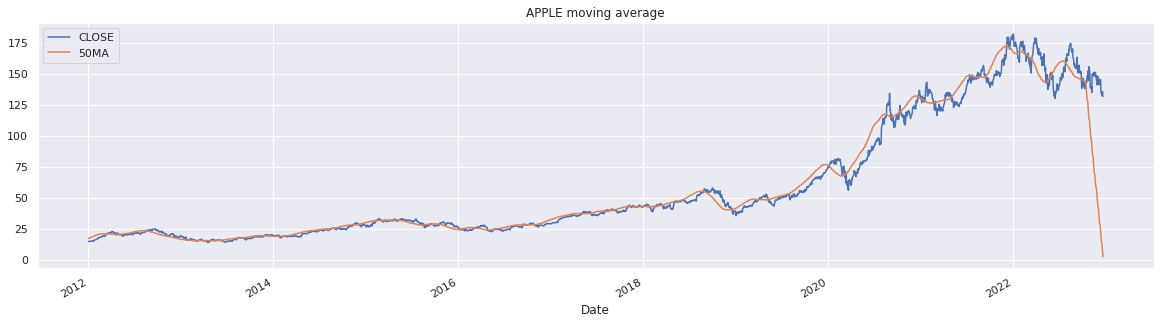

In [189]:
df[['CLOSE', '50MA']].plot().set_title('APPLE moving average')

**Changes in the price.**

In [190]:
df['returns'] = np.log(df['CLOSE']/df['CLOSE'].shift(1))

Text(0.5, 1.0, 'APPLE returns every day')

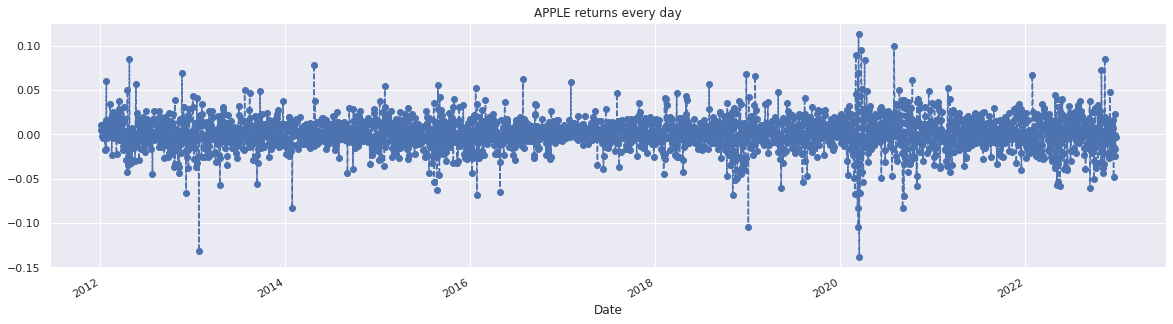

In [191]:
df['returns'].plot(linestyle='--', marker='o').set_title('APPLE returns every day')

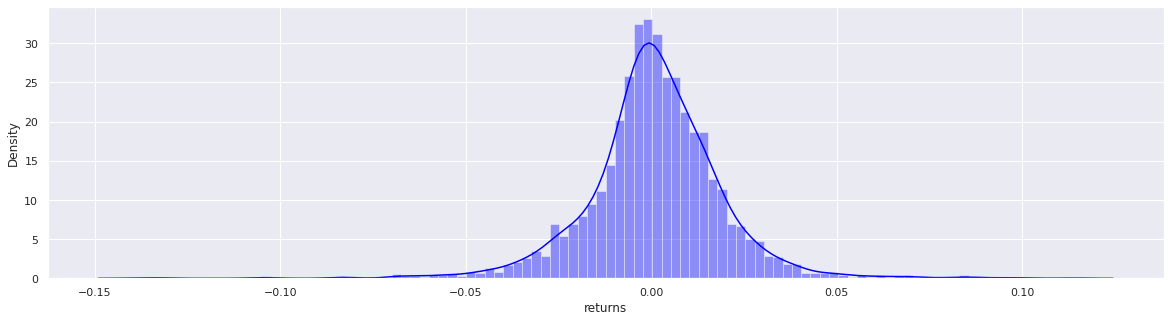

In [192]:
sns.distplot(df['returns'].dropna(), bins=100, color='blue')

**We get a normal distirdusion on returns.**

In [193]:
print("Skewness: %f" % df['returns'].skew())
print("Kurtosis: %f" % df['returns'].kurt())

Skewness: -0.277015
Kurtosis: 5.790824



**How much value do we put at risk by investing in apple?**



Text(0.5, 1.0, 'APPLE risk')

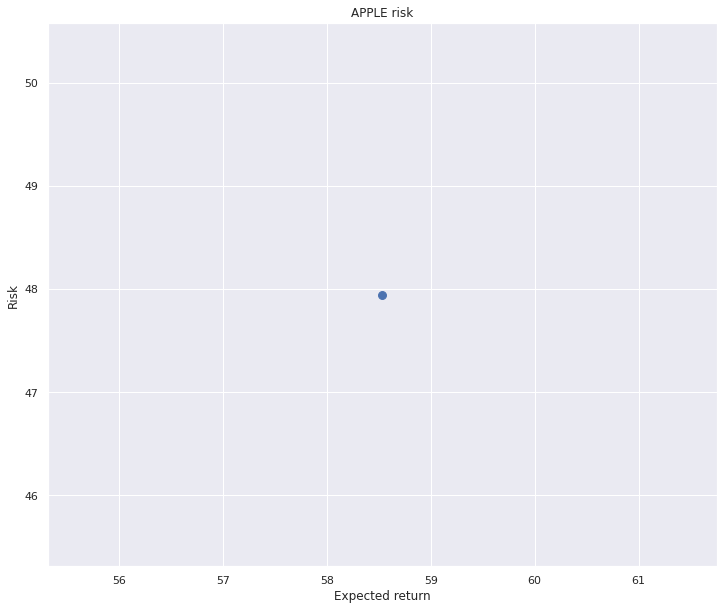

In [194]:
rets = df['CLOSE'].dropna()

area = np.pi*20


plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.grid(True)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('APPLE risk')

*Point data we have, our rolling volatility over the days by year, approximately 252 trading days*

In [195]:
df['rolling_volatility_30'] = df['returns'].dropna().rolling(30).std() * np.sqrt(252)
df['rolling_volatility_90'] = df['returns'].dropna().rolling(90).std() * np.sqrt(252)
df['rolling_volatility_252'] = df['returns'].dropna().rolling(252).std() * np.sqrt(252)

In [196]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,10MA,20MA,50MA,returns,rolling_volatility_30,rolling_volatility_90,rolling_volatility_252
Date,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,14.99,15.31,17.15,NaN,NaN,NaN,NaN
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.06,15.39,17.27,0.005360,NaN,NaN,NaN
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.11,15.46,17.39,0.011041,NaN,NaN,NaN
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08,2.713747,15.12,15.54,17.52,0.010400,NaN,NaN,NaN
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08,2.712160,15.14,15.61,17.65,-0.001587,NaN,NaN,NaN


Text(0.5, 1.0, 'Apple Rolling Volatility over Price')

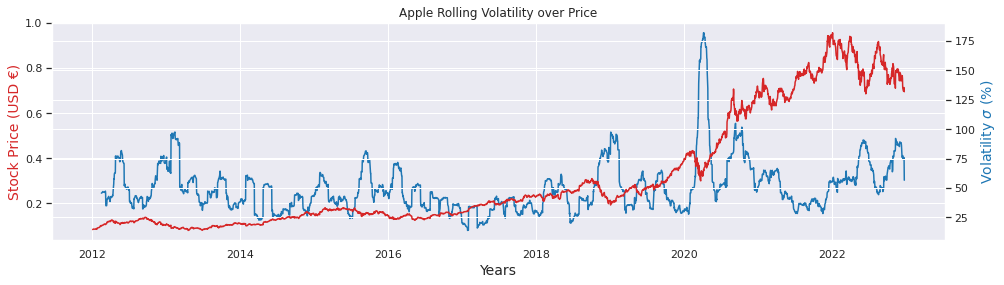

In [197]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['rolling_volatility_30'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df['CLOSE'], color='tab:red')
ax.set_ylabel("Stock Price (USD €)", color="tab:red", fontsize=14)
ax2.set_ylabel("Volatility $\sigma$ (%)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Rolling Volatility over Price')

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose

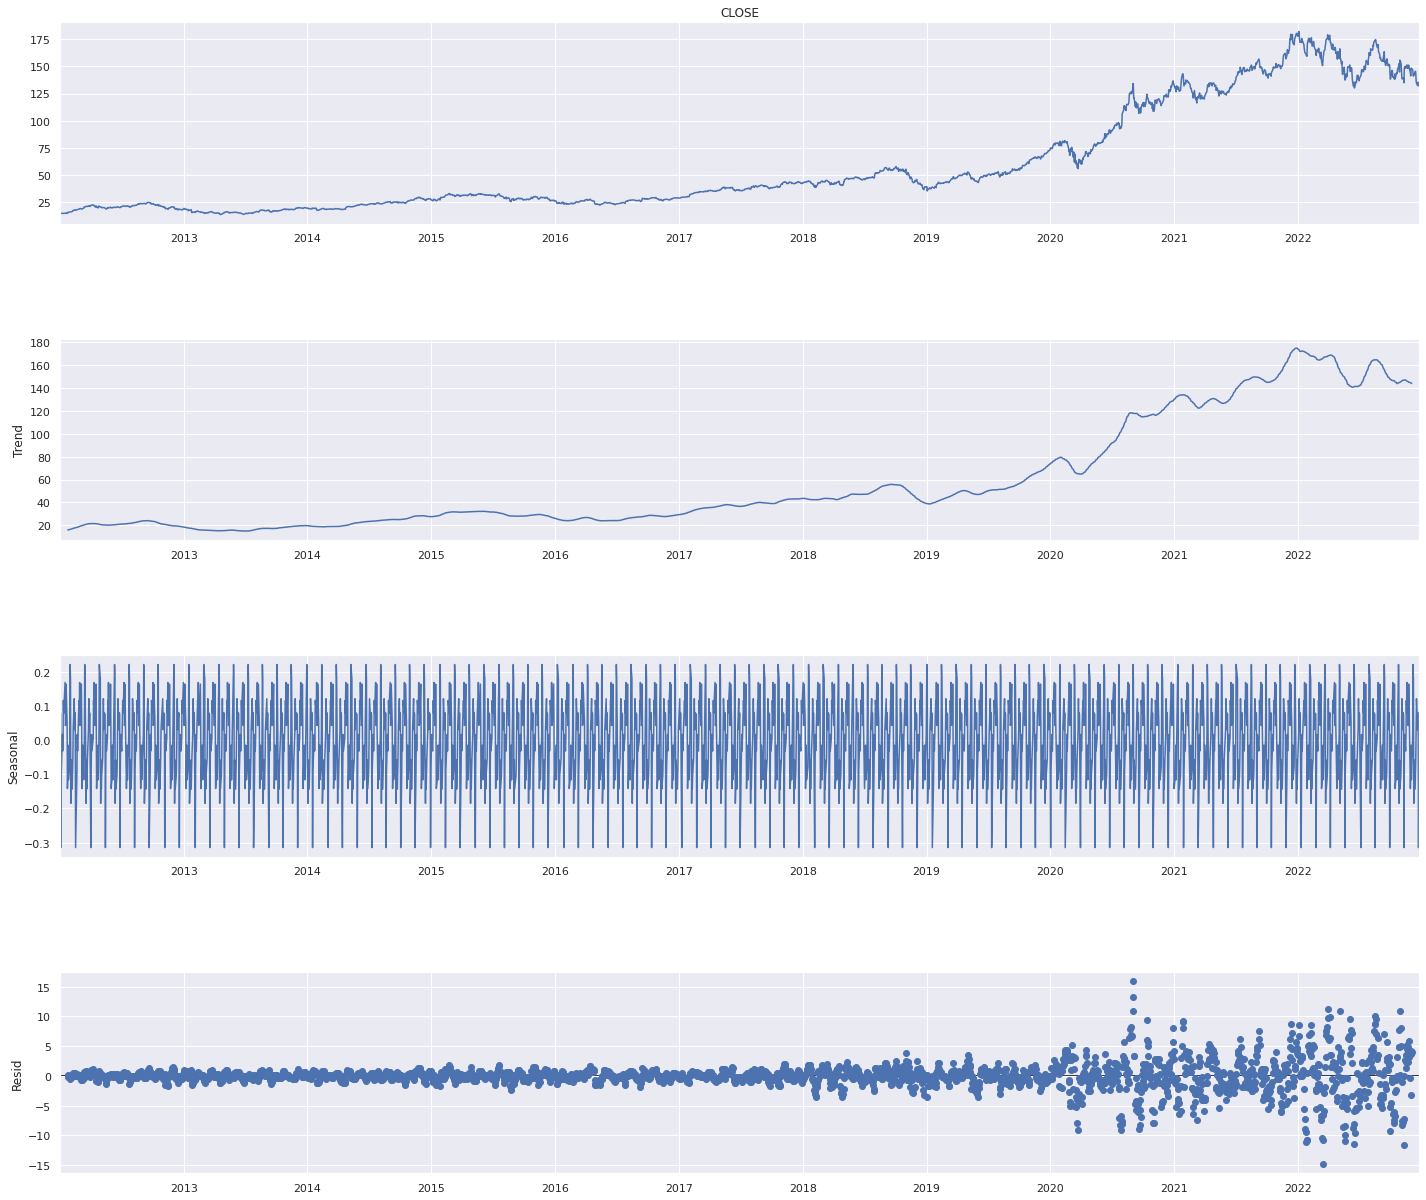

In [199]:
result = seasonal_decompose(df['CLOSE'], model='additive', period = 30)
fig = result.plot()  
fig.set_size_inches(20, 19)

**We can see a clear seasonality and rising trend and and high residual at the 2020-2022 span.**

# **BSM**

### **The Black-Scholes equations revolutionized option pricing when the paper was published by Mryon Scholes and Fischer Black in 1973.**

---
**It surely has a few assumptions:** 
*   Interest rate and Volatility are constant through time
*   Stock follows a random walk
*   Stock do not have transaction cost or pays dividends.
*   The option can be only executed at the expiration date.







**Going into the equation itself we see that the model gives out two important outputs and call and put values.**

 

 
C
a
l
l
=
S
0
N
(
d
1
)
−
N
(
d
2
)
K
e
−
r
T

 

P
u
t
=
N
(
−
d
2
)
K
e
−
r
T
−
N
(
−
d
1
)
S
0

 

d
1
=
l
n
(
S
K
)
+
(
r
+
σ
2
2
)
T
σ
√
T
d
2
=
d
1
−
σ
√
T

 

S : current asset price

K: strike price of the option

r: risk free rate 

T : time until option expiration 

sigma/σ: annualized volatility of the asset's returns 

In [200]:
#  Print out the results
from scipy.stats import norm
from scipy.optimize import minimize_scalar

N = norm.cdf

#Calculating the values of d1 and d2 as well as the calls and puts
def BSM_CALLS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BSM_PUTS(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1) 

def implied_vol(opt_value, S, K, T, r, type_='call'):
  def call_obj(sigma):
    return abs(BSM_CALLS(S, K, T, r, sigma) - opt_value)
    
  def put_obj(sigma):
    return abs(BSM_PUTS(S, K, T, r, sigma) - opt_value)
    
  if type_ == 'call':
    res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
    return res.x
  elif type_ == 'put':
    res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
    return res.x
  else:
    raise ValueError("type_ must be 'put' or 'call'")


**Tested function**

**Observe a stock in the market with a current price of 100 there is an option for sale for the right to buy the stock in exactly 1 year from now for 115 , the option  costs $100 and the risk free rate rate is 5%.**

In [201]:
S = 100
K = 115
T = 1
r = 0.05
sigma = 0.45

C = BSM_CALLS(S, K, T, r, sigma)
P = BSM_PUTS(S, K, T, r, sigma)
iv = implied_vol(P, S, K, T, r)
print(iv)

0.6875709590984305


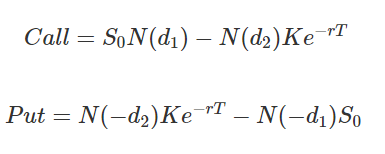

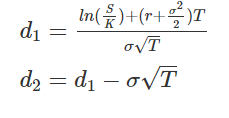

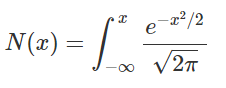

In [202]:
#  Print out the results
from math import sqrt, exp, log, pi

#Calculating the values of d1 and d2 as well as the calls and puts
def d(sigma, S, K, r, t):
    d1 = 1 / (sigma * sqrt(t)) * ( log(S/K) + (r + sigma**2/2) * t)
    d2 = d1 - sigma * sqrt(t)
    return d1, d2

def call_price(sigma, S, K, r, t, d1, d2):
    C = norm.cdf(d1) * S - norm.cdf(d2) * K * exp(-r * t)
    return C


def put_price(sigma, S, K, r, t, d1, d2):
    P = -norm.cdf(-d1) * S + norm.cdf(-d2) * K * exp(-r * t)
    return P
#  Option parameters
S = 200.0
K = 135
t = 30.0 / 365.0
r = 0.01
P0 =2.30 

def implied_volatility_call(C, S, K, T, r, tol = 1e-3, max_iterations=1000):

  #  Tolerances
  tol = 1e-3
  epsilon = 1

  #  Variables to log and manage number of iterations
  count = 0
  max_iter = len(df)

  #  We need to provide an initial guess for the root of our function
  vol = 0.50

  while epsilon > tol:
      #  Count how many iterations and make sure while loop doesn't run away
      count += 1
      if count >= max_iter:
          print('Breaking on count')
          break;

      #  Log the value previously calculated to computer percent change
      #  between iterations
      orig_vol = vol

      #  Calculate the vaule of the call price
      d1, d2 = d(vol, S, K, r, t)
      function_value = put_price(vol, S, K, r, t, d1, d2) - C

      #  Calculate vega, the derivative of the price with respect to
      #  volatility
      vega = S * norm.pdf(d1) * sqrt(t)

      #  Update for value of the volatility
      vol = -function_value / vega + vol

      #  Check the percent change between current and last iteration
      epsilon = abs( (vol - orig_vol) / orig_vol )
      return vol

def implied_volatility_put(P, S, K, T, r, tol = 1e-3, max_iterations=1000):

#  Tolerances
  tol = 1e-3
  epsilon = 1

#  Variables to log and manage number of iterations
  count = 0
  max_iter = len(df)

#  We need to provide an initial guess for the root of our function
  vol = 0.50

  while epsilon > tol:
    #  Count how many iterations and make sure while loop doesn't run away
    count += 1
    if count >= max_iter:
      print('Breaking on count')
      break;

    #  Log the value previously calculated to computer percent change
    #  between iterations
    orig_vol = vol

    #  Calculate the vaule of the put price
    d1, d2 = d(vol, S, K, r, t)
    function_value = call_price(sigma, S, K, r, t, d1, d2) - P

    #  Calculate vega, the derivative of the price with respect to
    #  volatility
    vega = S * norm.pdf(d1) * sqrt(t)

    #  Update for value of the volatility
    vol = -function_value / vega + vol

    #  Check the percent change between current and last iteration
    epsilon = abs( (vol - orig_vol) / orig_vol )
    return vol


In [203]:
#  Print out the results
print('Sigma = ', implied_volatility_call(C, S, K, T, r, tol = 1e-3, max_iterations=100))

Sigma =  33.72922782945141


**Going into the equation itself we see that the model gives out two important outputs and call and put values.**

**In order to get call, risk-adjusted strike price  at the time of expiry, i.e N(d2)K e-rt is detected from the current asset price after taking into account the variance through normal distribution. I.e S0N(d1)**

**In the same way to get put., we deduct the current asset price with variance from risk-adjusted strike price at the time of expiry but this time from the negative end of the distribution spectrum.**


Our implied volatility is at 46.77%

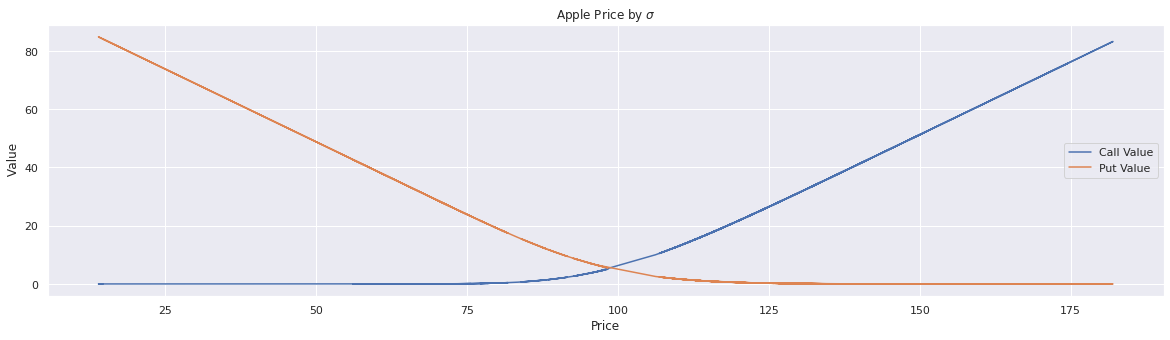

In [204]:
K = 100
r = 0.15
T = 30/365
sigma = 0.47

S = df['CLOSE'].to_numpy()

calls = [BSM_CALLS(s, K, T, r, sigma) for s in S]
puts = [BSM_PUTS(s, K, T, r, sigma) for s in S]

plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('Price')
plt.ylabel(' Value')
plt.title('Apple Price by $\sigma$')
plt.legend()

### **We get the volatility smile here with our data. The volatility smile is related to the fact that options at different strikes have different levels of implied volatility. It is calculated implied volatility using Newton's method**

In [205]:
df['calls']= calls
df['puts'] = puts

In [206]:
S = 100
K = 100
r = 0.15
T = 30/365
sigma = 0.17 

C = df['calls'].to_numpy()
P = df['puts'].to_numpy()
implied_volatility_call = [implied_volatility_call(C, S, K, T, r, tol = 1e-3, max_iterations=100) for c in C]
implied_volatility_put = [implied_volatility_put(P, S, K, T, r, tol = 1e-3, max_iterations=100) for p in P]

In [207]:
len(implied_volatility_put)

2764

In [208]:
implied_volatility_put[0]

array([ 7.38521917,  7.37823188,  7.36371983, ..., -0.0543766 ,
       -0.051468  , -0.05103731])

In [209]:
implied_volatility_call[0]

array([0.04965874, 0.04965874, 0.04965874, ..., 3.30084292, 3.01869529,
       2.98637108])

In [210]:
x = pd.DataFrame(implied_volatility_call[0])
y = pd.DataFrame(implied_volatility_put[0])

In [211]:
df['implied_volatility_calls'] = x.values
df['implied_volatility_puts'] = y.values

In [212]:
df['implied_volatility_puts']

Date
2012-01-03    7.385219
2012-01-04    7.378232
2012-01-05    7.363720
2012-01-06    7.349903
2012-01-09    7.352022
                ...   
2022-12-19   -0.051625
2022-12-20   -0.051547
2022-12-21   -0.054377
2022-12-22   -0.051468
2022-12-23   -0.051037
Name: implied_volatility_puts, Length: 2764, dtype: float64

In [213]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,10MA,20MA,50MA,returns,rolling_volatility_30,rolling_volatility_90,rolling_volatility_252,calls,puts,implied_volatility_calls,implied_volatility_puts
Date,,,,,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,14.99,15.31,17.15,NaN,NaN,NaN,NaN,3.621227e-46,84.087921,0.049659,7.385219
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.06,15.39,17.27,0.005360,NaN,NaN,NaN,6.403699e-46,84.008993,0.049659,7.378232
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.11,15.46,17.39,0.011041,NaN,NaN,NaN,2.061956e-45,83.845064,0.049659,7.363720
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08,2.713747,15.12,15.54,17.52,0.010400,NaN,NaN,NaN,6.165812e-45,83.688993,0.049659,7.349903
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08,2.712160,15.14,15.61,17.65,-0.001587,NaN,NaN,NaN,5.218446e-45,83.712921,0.049659,7.352022


In [214]:
df['implied_volatility_puts']

Date
2012-01-03    7.385219
2012-01-04    7.378232
2012-01-05    7.363720
2012-01-06    7.349903
2012-01-09    7.352022
                ...   
2022-12-19   -0.051625
2022-12-20   -0.051547
2022-12-21   -0.054377
2022-12-22   -0.051468
2022-12-23   -0.051037
Name: implied_volatility_puts, Length: 2764, dtype: float64

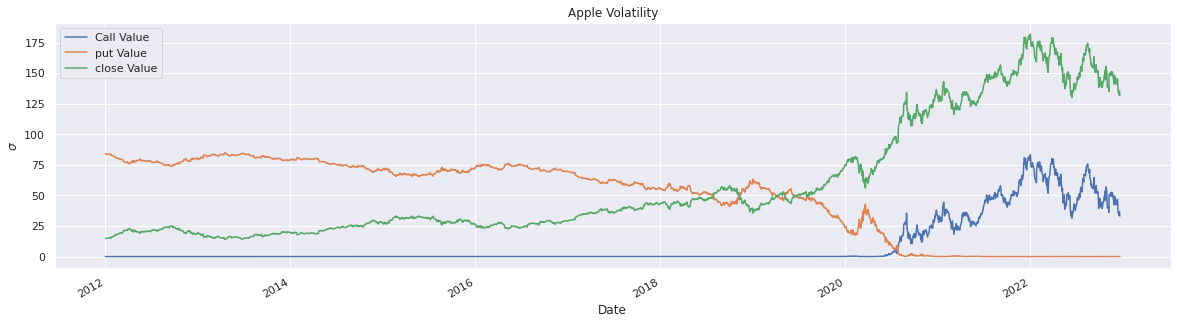

In [215]:
df.calls.plot(label='Call Value')
df.puts.plot(label='put Value')
df.CLOSE.plot(label='close Value')
plt.ylabel('$\sigma$')
plt.title('Apple Volatility')
plt.legend()

**Call option**

A call option is the right to buy an asset at a predetermined price.  
 

**Put Option**

A put option is the right to sell and asset at a predetermined price. 

**Next is MCAD, to understand it we needed to know EMA, i.e what it does is by averaging, it gives more value to recent data,, than the ones that are at a distance..**

**Components of MACD**
*To get MACD line we subtract a longer period EMA by a shorter one. For example I have a 10 days EMA and 50 Days EMA, we will do a 10-50.
Signal Line is nothing but the EMA line.*

In [216]:
# MACD parameters
short_period = 12
long_period  = 26
signal_period = 9
ewm_short=df['CLOSE'].ewm(span=short_period, adjust=False).mean()
ewm_long=df['CLOSE'].ewm(span=long_period, adjust=False).mean() 
MACD=ewm_short-ewm_long
signal_MACD=MACD.ewm(span=signal_period, adjust=False).mean()
bars=MACD-signal_MACD
bar_values=bars.values
bar_index_number=np.arange(0,len(bar_values))

In [217]:
df['MACD'] = MACD.values
df['signal_MACD'] = signal_MACD.values

In [218]:
df['VWAP'] = (df.CLOSE * df.VOLUME).cumsum() / df.VOLUME.cumsum()

In [219]:
# Create TWAP function
def TWAP(dataframe):
    tp = (df['LOW'] + df['CLOSE'] + df['HIGH']+ df['VOLUME']).divide(4)
    return df.assign(twap=(tp.rolling(1).sum().divide(1)))

twap_df = TWAP(df)
df['TWAP'] = twap_df['twap']

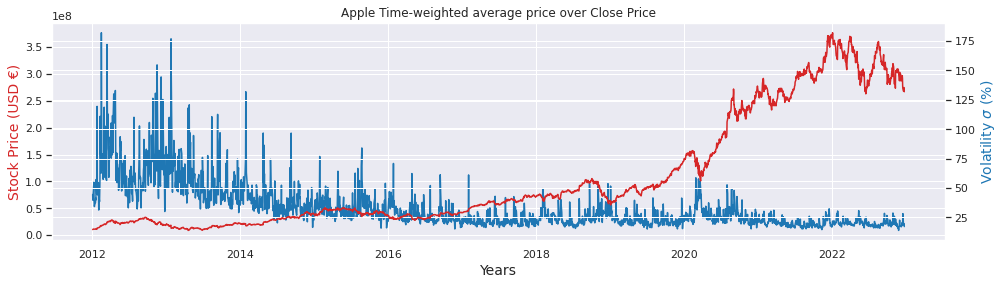

In [220]:
fig,ax = plt.subplots(figsize=(16,4))
ax.plot(df['TWAP'], color='tab:blue')
ax2=ax.twinx()
ax2.plot(df['CLOSE'], color='tab:red')
ax.set_ylabel("Stock Price (USD €)", color="tab:red", fontsize=14)
ax2.set_ylabel("Volatility $\sigma$ (%)",color="tab:blue",fontsize=14) 
ax.set_xlabel("Years", fontsize = 14)
plt.title('Apple Time-weighted average price over Close Price')
plt.show()

**As we can see here they have a negative almost co-relation.**

In [221]:
df['implied_volatility_calls'] = x.values
df['implied_volatility_puts'] = y.values

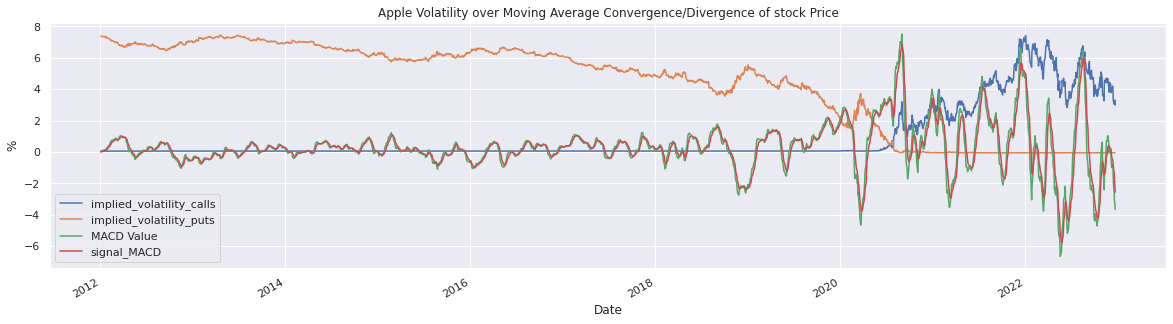

In [222]:
df.implied_volatility_calls.plot(label='implied_volatility_calls')
df.implied_volatility_puts.plot(label='implied_volatility_puts')
df.MACD.plot(label='MACD Value')
df.signal_MACD.plot(label='signal_MACD') 
plt.ylabel('$\%$')
plt.title('Apple Volatility over Moving Average Convergence/Divergence of stock Price')
plt.legend() 

**MACD Strategy:**
*   **IF MACD LINE > SIGNAL LINE => BUY THE STOCK**
*   **IF SIGNAL LINE > MACD LINE => SELL THE STOCK**




In [223]:
df.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,CLOSE_log,10MA,20MA,50MA,...,rolling_volatility_90,rolling_volatility_252,calls,puts,implied_volatility_calls,implied_volatility_puts,MACD,signal_MACD,VWAP,TWAP
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.732128,14.686771,14.607128,14.621414,62904,3.022591e+08,2.686947,14.99,15.31,17.15,...,NaN,NaN,3.621227e-46,84.087921,0.049659,7.385219,0.000000,0.000000,14.686771,7.556479e+07
2012-01-04,14.809985,14.765700,14.617128,14.642843,56155,2.602447e+08,2.692307,15.06,15.39,17.27,...,NaN,NaN,6.403699e-46,84.008993,0.049659,7.378232,0.006296,0.001259,14.723288,6.506118e+07
2012-01-05,14.948199,14.929628,14.738200,14.819628,58360,2.712675e+08,2.703348,15.11,15.46,17.39,...,NaN,NaN,2.061956e-45,83.845064,0.049659,7.363720,0.024234,0.005854,14.790420,6.781688e+07
2012-01-06,15.098199,15.085699,14.972128,14.991771,67784,3.183860e+08,2.713747,15.12,15.54,17.52,...,NaN,NaN,6.165812e-45,83.688993,0.049659,7.349903,0.050462,0.014776,14.872017,7.959650e+07
2012-01-09,15.276770,15.061771,15.048199,15.196417,80332,3.940236e+08,2.712160,15.14,15.61,17.65,...,NaN,NaN,5.218446e-45,83.712921,0.049659,7.352022,0.068528,0.025526,14.920374,9.850590e+07


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2012-01-03 to 2022-12-23
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HIGH                      2764 non-null   float64
 1   CLOSE                     2764 non-null   float64
 2   LOW                       2764 non-null   float64
 3   OPEN                      2764 non-null   float64
 4   COUNT                     2764 non-null   int64  
 5   VOLUME                    2764 non-null   float64
 6   CLOSE_log                 2764 non-null   float64
 7   10MA                      2764 non-null   float64
 8   20MA                      2764 non-null   float64
 9   50MA                      2764 non-null   float64
 10  returns                   2763 non-null   float64
 11  rolling_volatility_30     2734 non-null   float64
 12  rolling_volatility_90     2674 non-null   float64
 13  rolling_volatility_252    2512 non-null   flo

In [225]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([10, 11, 12, 13]),)


In [226]:
df.loc[df['returns'].isnull() == True,'returns'] = df['returns'].mode()[0]
df.loc[df['rolling_volatility_30'].isnull() == True,'rolling_volatility_30'] = df['rolling_volatility_30'].mode()[0]

df.loc[df['rolling_volatility_90'].isnull() == True,'rolling_volatility_90'] = df['rolling_volatility_90'].mode()[0]
df.loc[df['rolling_volatility_252'].isnull() == True,'rolling_volatility_252'] = df['rolling_volatility_252'].mode()[0] 

In [227]:
df.isnull().sum()

HIGH                        0
CLOSE                       0
LOW                         0
OPEN                        0
COUNT                       0
VOLUME                      0
CLOSE_log                   0
10MA                        0
20MA                        0
50MA                        0
returns                     0
rolling_volatility_30       0
rolling_volatility_90       0
rolling_volatility_252      0
calls                       0
puts                        0
implied_volatility_calls    0
implied_volatility_puts     0
MACD                        0
signal_MACD                 0
VWAP                        0
TWAP                        0
dtype: int64

In [228]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [229]:
df = df[['CLOSE']].values
df = df.reshape(-1, 1)

In [230]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [231]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [232]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [233]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [234]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [235]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

**We have initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer.**

**Making the dropout fraction 0.2 drops 20% of the layers.**

**After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:**

In [236]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [237]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [238]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('app_stock_pred.h5')

Epoch 1/50
68/68 [==============================] - 17s 148ms/step - loss: 0.0047
Epoch 2/50
68/68 [==============================] - 9s 130ms/step - loss: 0.0011
Epoch 3/50
68/68 [==============================] - 9s 132ms/step - loss: 0.0012
Epoch 4/50
68/68 [==============================] - 9s 130ms/step - loss: 8.8526e-04
Epoch 5/50
68/68 [==============================] - 9s 131ms/step - loss: 8.2262e-04
Epoch 6/50
68/68 [==============================] - 9s 129ms/step - loss: 0.0012
Epoch 7/50
68/68 [==============================] - 9s 130ms/step - loss: 9.2919e-04
Epoch 8/50
68/68 [==============================] - 9s 129ms/step - loss: 0.0016
Epoch 9/50
68/68 [==============================] - 9s 131ms/step - loss: 7.2415e-04
Epoch 10/50
68/68 [==============================] - 11s 158ms/step - loss: 8.3655e-04
Epoch 11/50
68/68 [==============================] - 10s 139ms/step - loss: 8.2707e-04
Epoch 12/50
68/68 [==============================] - 9s 132ms/step - loss: 7.881

**Each epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.**

In [239]:
model = load_model('app_stock_pred.h5')

16/16 [==============================] - 2s 38ms/step


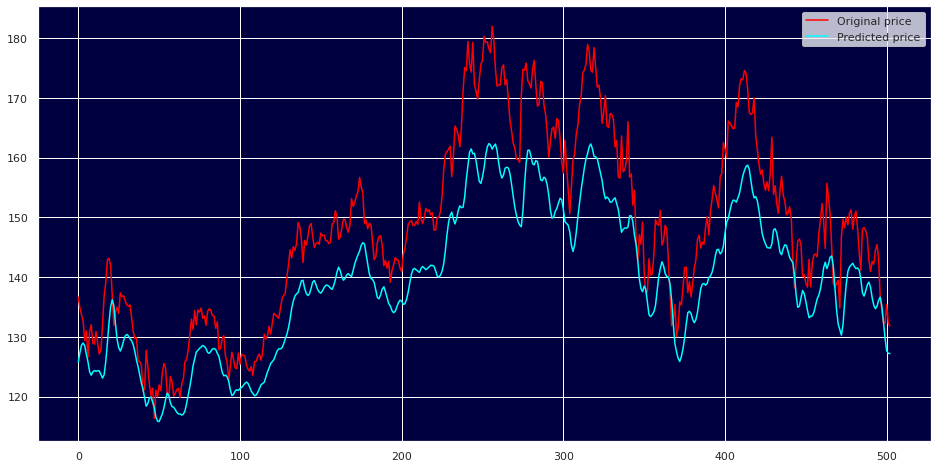

In [240]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

**A very good prediction result!  We build the ANN to get the max precision value and least error.**

**Change layers, numbers, epochs, and batch_size, will update the prediction and more accurate.**

**Compare this number to the one we calculated using the brute force approach, they are effectively identical. ANN is better accuracy but not speed as hoped, but BSM does. You can verify this number is correct by plugging the imp_vol back into the Black-Scholes formula.**

 

**It took approximately 0.002 seconds when I ran the BSM snippet, comparing this to 5 seconds it took when using the brute force approach. Consider again calculating the implied volatility for 1000 options using both approaches; using Newton Raphson we would be finished in 2 seconds in comparison to well over an hour for brute force approach. A significant increase in speed!**